# PCA and LDA on face dataset and classification using SVM

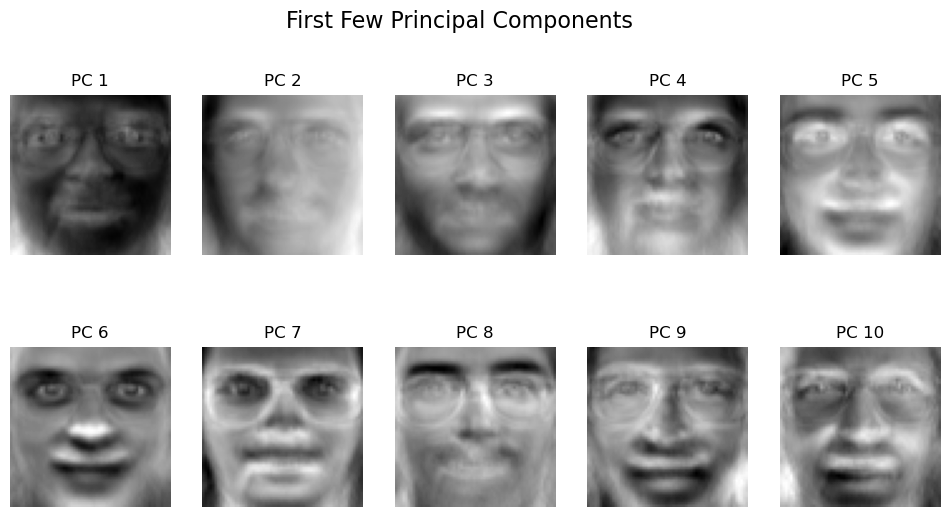

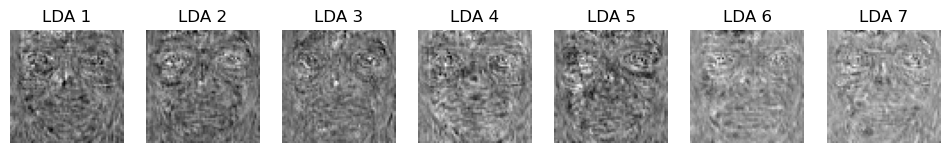

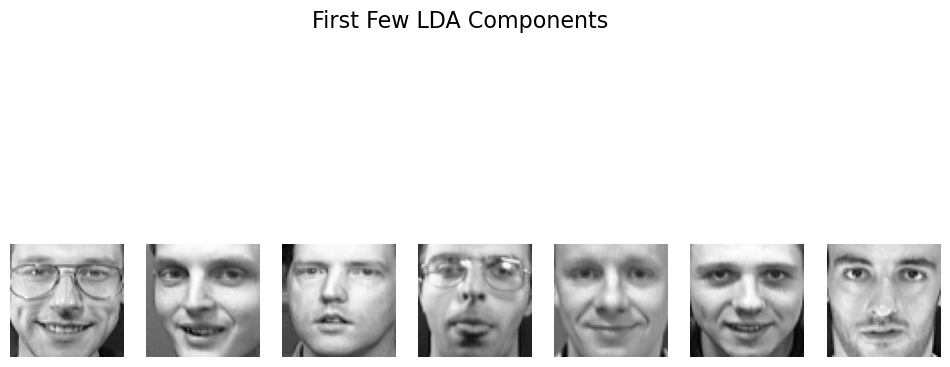

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Load Faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=22)
X = faces_data.data
y = faces_data.target

# PCA for dimensionality reduction
n_components_pca = 10
pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X)

# LDA for dimensionality reduction
n_components_lda = 10
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_lda = lda.fit_transform(X, y)

# Visualize the first few principal components
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    plt.title("PC {}".format(i + 1))
    plt.axis("off")
plt.suptitle("First Few Principal Components", fontsize=16)
plt.show()

# Visualize the first few LDA components
plt.figure(figsize=(12, 6))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(lda.scalings_[:, i].reshape(64, 64), cmap='gray')
    plt.title("LDA {}".format(i + 1))
    plt.axis("off")

plt.figure(figsize=(12, 6))
for i in range(7):   
    plt.subplot(1, 7, i + 1)
    plt.imshow(X[i].reshape(64, 64), cmap='gray')
    plt.axis("off")
    
plt.suptitle("Original Images", fontsize=16)
plt.suptitle("First Few LDA Components", fontsize=16)

plt.show()



# Lab Task: Use the PCA and LDA transformed feature and perform face classification using SVM classifier

### Implementing SVM without  Applying PCA or LDA

In [77]:
# Split original Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [78]:
# Train a SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [79]:
# predictions on the test set
y_pred = svm.predict(X_test)

# accuracy of SVM Classifier on Original Dataset 
accuracy = accuracy_score(y_test, y_pred)
accuracy_per = accuracy*100
print("Accuracy of SVM Classifier:", accuracy_per, '%')

Accuracy of SVM Classifier: 94.0 %


### Implementing SVM with applying PCA

In [71]:
# Split dataset using transformed PCA (X_pca)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=50)

In [72]:
# Train a SVM classifier on PCA-transformed data
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [73]:
# predictions on the test set for PCA
y_pred_pca = svm_pca.predict(X_test_pca)


# accuracy for PCA 
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_pca_per = accuracy_pca*100
print("Accuracy of SVM Classifier when applying PCA:", accuracy_pca_per, '%')

Accuracy of SVM Classifier when applying PCA: 89.0 %


### Implementing SVM with applying LDA

In [74]:
# Split dataset using transformed LDA (X_lda)
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.25, random_state=50)

In [75]:
# Train a SVM classifier on LDA-transformed data
svm_lda = SVC(kernel='linear')
svm_lda.fit(X_train_lda, y_train)

SVC(kernel='linear')

In [76]:
# predictions on the test set for LDA
y_pred_lda = svm_lda.predict(X_test_lda)


# accuracy for LDA 
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_lda_per = accuracy_lda*100
print("Accuracy of SVM Classifier when applying LDA:", accuracy_lda_per, '%')

Accuracy of SVM Classifier when applying LDA: 100.0 %


# Conclusion 

So in this notebook I have used faces dataset and first I applied SVM classifier on original dataset and it gives me 94% accuracy. After that I have applied PCA on input features (X) and used that transformed X while spliting the dataset into training and testing, then I have applied SVM classifier on transformed data with PCA and it gives me 89% of accuracy.

At the end I have applied LDA on input features (X) and used that transformed X while spliting the dataset into training and testing, then I have applied SVM classifier on transformed data with LDA and it gives me 100% of accuracy.

Conclusion is that the accuracy through LDA is imporved because when LDA reduce the input features it will also do the seperation between different classes (as shown in below graph in LDA Transformation) which will be easy for classifier to take decision. Whereas in case of PCA it only reduce the input features but did not seprate the classes (as shown in below graph in PCA Transorfmation), so that is difficult for the classifier to take decision about the point belongs to which class.

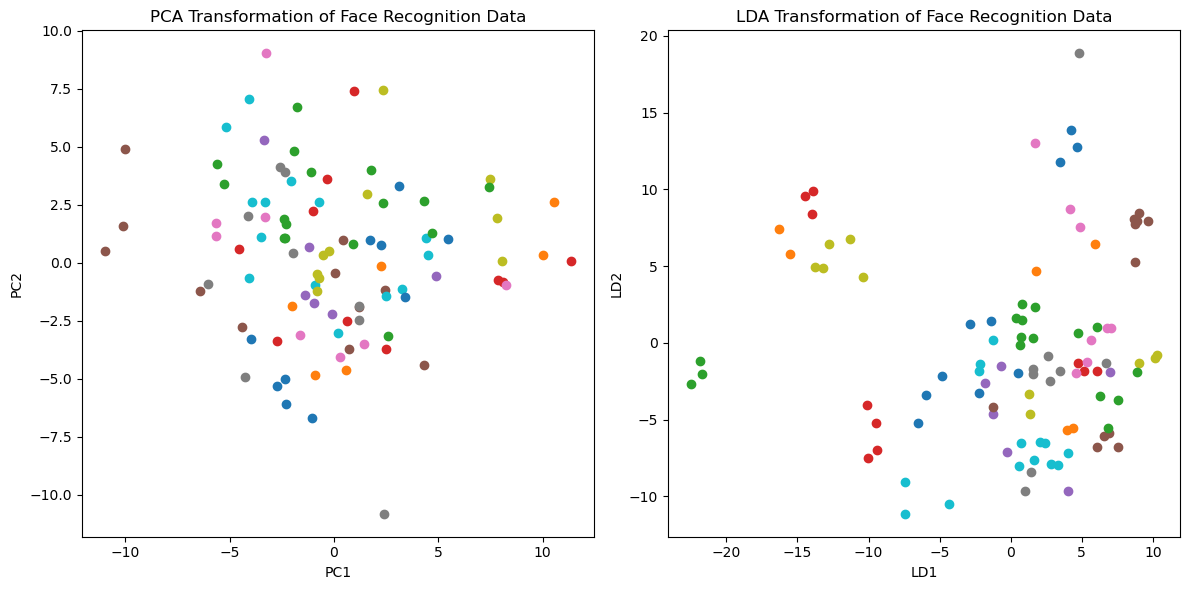


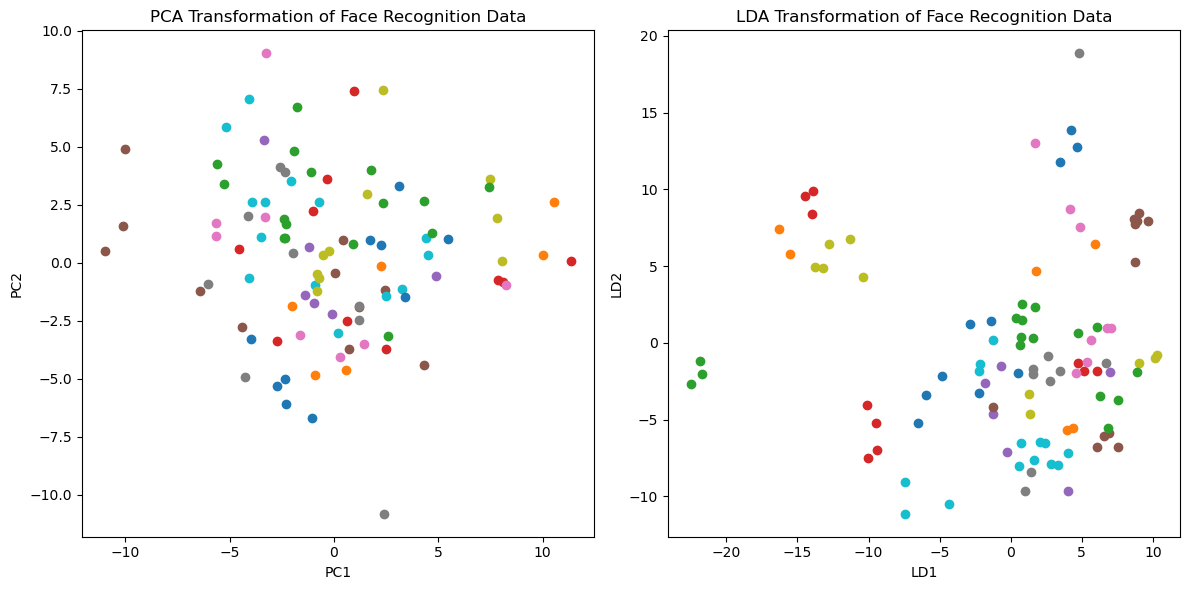

In [81]:
# PCA and LDA Visualization

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i, target_name in enumerate(faces_data.target):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=target_name)
plt.title('PCA Transformation of Face Recognition Data')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
for i, target_name in enumerate(faces_data.target):
    plt.scatter(X_test_lda[y_test == i, 0], X_test_lda[y_test == i, 1], label=target_name)
plt.title('LDA Transformation of Face Recognition Data')
plt.xlabel('LD1')
plt.ylabel('LD2')


plt.tight_layout()
plt.show()